# PIMA REPORT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('pima-indians-diabetes-2.csv')
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe(include='all')

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [6]:
a=df['class']
b=df.drop('class',axis=1)

In [7]:
b

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
b=b.replace(0.000000,np.nan)
b

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47


In [9]:
median = lambda x: x.fillna(x.median())
b= b.apply(median)
b.sample(20)

,Preg,Plas,Pres,skin,test,mass,pedi,age
102,4.0,125.0,96.0,29.0,125.0,22.5,0.262,21
337,5.0,115.0,76.0,29.0,125.0,31.2,0.343,44
100,1.0,163.0,72.0,29.0,125.0,39.0,1.222,33
234,3.0,74.0,68.0,28.0,45.0,29.7,0.293,23
352,3.0,61.0,82.0,28.0,125.0,34.4,0.243,46
665,1.0,112.0,80.0,45.0,132.0,34.8,0.217,24
121,6.0,111.0,64.0,39.0,125.0,34.2,0.260,24
412,1.0,143.0,84.0,23.0,310.0,42.4,1.076,22
739,1.0,102.0,74.0,29.0,125.0,39.5,0.293,42
566,1.0,99.0,72.0,30.0,18.0,38.6,0.412,21


In [11]:
df=pd.concat([b,a],axis=1)
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47,1


<AxesSubplot:>

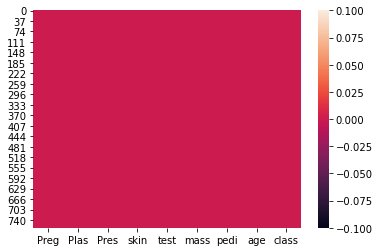

In [12]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='class', ylabel='mass'>

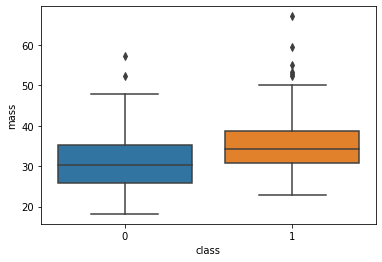

In [13]:
sns.boxplot(data=df, x='class', y='mass')

p=np.array(df['mass'])
q=np.where(p>50)
q

df=df.drop(index=[120,125,177,193,247,303,445,673], axis=0, inplace=True)

In [14]:
x=df.drop('class', axis=1)
y=df['class']
x,y

(     Preg   Plas  Pres  skin   test  mass   pedi  age
 0     6.0  148.0  72.0  35.0  125.0  33.6  0.627   50
 1     1.0   85.0  66.0  29.0  125.0  26.6  0.351   31
 2     8.0  183.0  64.0  29.0  125.0  23.3  0.672   32
 3     1.0   89.0  66.0  23.0   94.0  28.1  0.167   21
 4     4.0  137.0  40.0  35.0  168.0  43.1  2.288   33
 ..    ...    ...   ...   ...    ...   ...    ...  ...
 763  10.0  101.0  76.0  48.0  180.0  32.9  0.171   63
 764   2.0  122.0  70.0  27.0  125.0  36.8  0.340   27
 765   5.0  121.0  72.0  23.0  112.0  26.2  0.245   30
 766   1.0  126.0  60.0  29.0  125.0  30.1  0.349   47
 767   1.0   93.0  70.0  31.0  125.0  30.4  0.315   23
 
 [768 rows x 8 columns],
 0      1
 1      0
 2      1
 3      0
 4      1
       ..
 763    0
 764    0
 765    0
 766    1
 767    0
 Name: class, Length: 768, dtype: int64)

In [15]:
np.shape(x),np.shape(y)

((768, 8), (768,))

<AxesSubplot:>

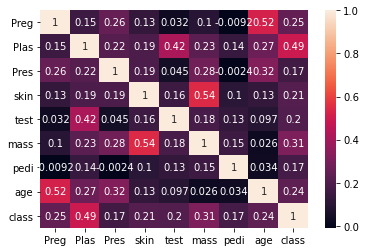

In [17]:
corr=df.corr()
sns.heatmap(corr, annot=True)

## LOGISTIC REGRESSION

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [57]:
model=LogisticRegression()
model.fit(x_train,y_train)

/Users/jasleenkaur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
predicted=model.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [60]:
accuracy_score(y_test,predicted)

0.7792207792207793

In [61]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231



<AxesSubplot:>

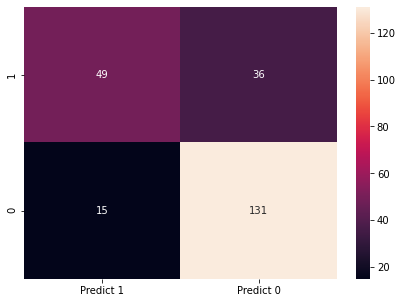

In [62]:
cm=confusion_matrix(y_test,predicted, labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ['1','0']], columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## DECISION TREE CLASSIFIER

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtree= DecisionTreeClassifier(criterion='gini',max_depth=5, random_state=1)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [27]:
dtree.score(x_train,y_train)

0.8379888268156425

In [28]:
dtree.score(x_test,y_test)

0.7965367965367965

## ENSEMBLE TECHNIQUES

In [29]:
from sklearn.ensemble import BaggingClassifier
bgcl=BaggingClassifier(n_estimators=50, base_estimator=dtree,random_state=1)
bgcl=bgcl.fit(x_train,y_train)

0.8621973929236499
0.7792207792207793


<AxesSubplot:>

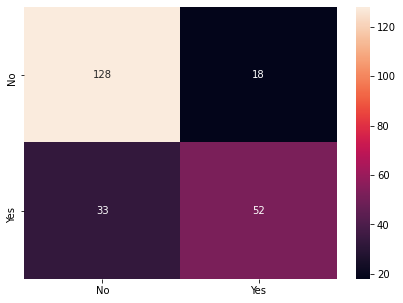

In [30]:
from sklearn import metrics
y_predict=bgcl.predict(x_test)
print(bgcl.score(x_train,y_train))
print(bgcl.score(x_test,y_test))
cm=metrics.confusion_matrix(y_test,y_predict, labels=[0,1])
df_cm=pd.DataFrame(cm, index = [i for i in['No','Yes']],columns=[i for i in['No','Yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(n_estimators=100, max_features=4,random_state=1)
rfcl=rfcl.fit(x_train,y_train)
rfcl=rfcl.fit(x_train,y_train)

1.0
0.7965367965367965
0.7965367965367965


<AxesSubplot:>

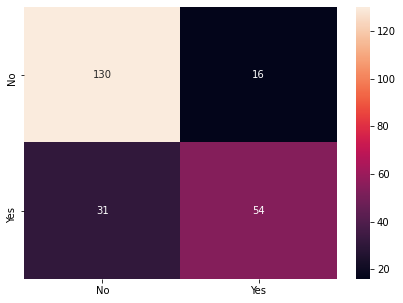

In [32]:
y_predict=rfcl.predict(x_test)
print(rfcl.score(x_train,y_train))
print(rfcl.score(x_test,y_test))
print(metrics.accuracy_score(y_test, y_predict))
cm=metrics.confusion_matrix(y_test,y_predict, labels=[0,1])
df_cm=pd.DataFrame(cm, index = [i for i in['No','Yes']],columns=[i for i in['No','Yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [33]:
from sklearn.ensemble import AdaBoostClassifier
abcl=AdaBoostClassifier(n_estimators=50,random_state=1)
abcl=rfcl.fit(x_train,y_train)
abcl=rfcl.fit(x_train,y_train)

1.0
0.7965367965367965
0.7965367965367965


<AxesSubplot:>

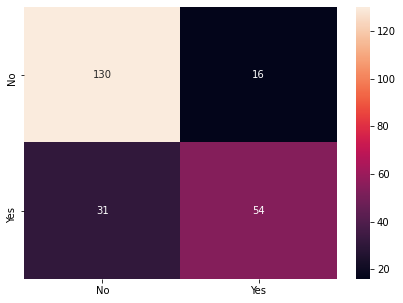

In [34]:
y_predict=abcl.predict(x_test)
print(abcl.score(x_train,y_train))
print(abcl.score(x_test,y_test))
print(metrics.accuracy_score(y_test, y_predict))
cm=metrics.confusion_matrix(y_test,y_predict, labels=[0,1])
df_cm=pd.DataFrame(cm, index = [i for i in['No','Yes']],columns=[i for i in['No','Yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl=GradientBoostingClassifier(n_estimators=50,random_state=1)
gbcl=rfcl.fit(x_train,y_train)
gbcl=rfcl.fit(x_train,y_train)

1.0
0.7965367965367965
0.7965367965367965


<AxesSubplot:>

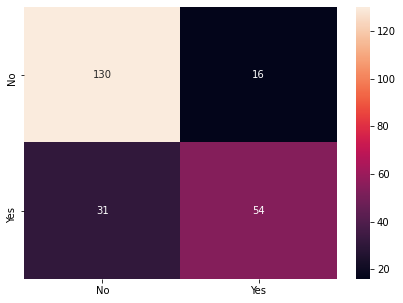

In [36]:
y_predict=gbcl.predict(x_test)
print(gbcl.score(x_train,y_train))
print(gbcl.score(x_test,y_test))
print(metrics.accuracy_score(y_test, y_predict))
cm=metrics.confusion_matrix(y_test,y_predict, labels=[0,1])
df_cm=pd.DataFrame(cm, index = [i for i in['No','Yes']],columns=[i for i in['No','Yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## K-NEIGHBORS CLASSIFIER

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
xscaled=x.apply(zscore)
xscaled.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.139492e-17,7.661695e-18,-1.123956e-17,-1.795800e-16,4.416317e-17,2.815312e-16,2.398978e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.149280e+00,-2.552931e+00,-4.002619e+00,-2.516429e+00,-1.467353e+00,-2.074783e+00,-1.189553e+00,-1.041549e+00
25%,-8.135452e-01,-7.201630e-01,-6.937615e-01,-4.675972e-01,-2.220849e-01,-7.212087e-01,-6.889685e-01,-7.862862e-01
50%,-1.420753e-01,-1.530732e-01,-3.198993e-02,-1.230129e-02,-1.815412e-01,-2.258989e-02,-3.001282e-01,-3.608474e-01
75%,5.293945e-01,6.112653e-01,6.297816e-01,3.291706e-01,-1.554775e-01,6.032562e-01,4.662269e-01,6.602056e-01
max,4.222479e+00,2.542658e+00,4.104082e+00,7.955377e+00,8.170442e+00,5.042397e+00,5.883565e+00,4.063716e+00


In [38]:
x_train,x_test,y_train,y_test=train_test_split(xscaled,y,test_size=30, random_state=42)

In [39]:
NHH=KNeighborsClassifier(n_neighbors=25, metric='euclidean')

In [40]:
NHH.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=25)

In [41]:
predicted_labels=NHH.predict(x_test)

In [42]:
NHH.score(x_test, y_test)

0.6666666666666666

## NAIVE BAYES

In [43]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [44]:
predict=model.predict(x_test)
from sklearn import metrics
print("Model Accuracy : {0:.4f}".format(metrics.accuracy_score(y_test,predict)))

Model Accuracy : 0.7000
